In [5]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [6]:
import pandas as pd
# Load stock data from CSV file
df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9511,2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23118900
9512,2023-12-08,369.200012,374.459991,368.230011,374.230011,374.230011,20144800
9513,2023-12-11,368.480011,371.600006,366.100006,371.299988,371.299988,27708800
9514,2023-12-12,370.850006,374.420013,370.459991,374.380005,374.380005,24838300


In [7]:
# Select relevant columns (Date and Close) Here Close refers to Closing price
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9511,2023-12-07,370.950012
9512,2023-12-08,374.230011
9513,2023-12-11,371.299988
9514,2023-12-12,374.380005


In [8]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9511    2023-12-07
9512    2023-12-08
9513    2023-12-11
9514    2023-12-12
9515    2023-12-13
Name: Date, Length: 9516, dtype: object

In [9]:
# Import the datetime module
import datetime

# Define a function to convert a date string to a datetime object
def convert_string_to_datetime(date_string):
    # Split the input string into year, month, and day
    year, month, day = map(int, date_string.split('-'))

    # Create and return a datetime object using the extracted components
    return datetime.datetime(year=year, month=month, day=day)

# Example usage: Convert the string '1986-03-19' to a datetime object
resulting_datetime = convert_string_to_datetime('1986-03-19')
resulting_datetime

datetime.datetime(1986, 3, 19, 0, 0)

In [10]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9511,2023-12-07,370.950012
9512,2023-12-08,374.230011
9513,2023-12-11,371.299988
9514,2023-12-12,374.380005


In [11]:
# Convert 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

<ipython-input-11-06c37ac78115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9511   2023-12-07
9512   2023-12-08
9513   2023-12-11
9514   2023-12-12
9515   2023-12-13
Name: Date, Length: 9516, dtype: datetime64[ns]

In [12]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-12-07,370.950012
2023-12-08,374.230011
2023-12-11,371.299988


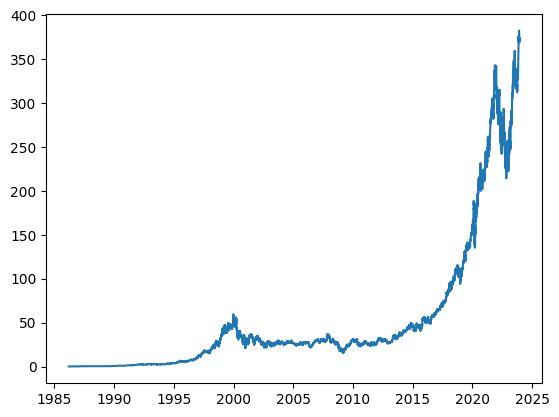

In [13]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])


In [14]:
import numpy as np

def create_windowed_dataframe(dataframe, start_date_str, end_date_str, window_size=3):
    start_date = convert_string_to_datetime(start_date_str)
    end_date = convert_string_to_datetime(end_date_str)

    current_date = start_date
    dates = []
    features, targets = [], []

    last_iteration = False
    while True:
        # Extract a window of data from the DataFrame up to the current date
        window_subset = dataframe.loc[:current_date].tail(window_size + 1)

        if len(window_subset) != window_size + 1:
            print(f'Error: Window of size {window_size} is too large for date {current_date}')
            return

        values = window_subset['Close'].to_numpy()
        feature_values, target_value = values[:-1], values[-1]

        # Record the current date, features, and target value
        dates.append(current_date)
        features.append(feature_values)
        targets.append(target_value)

        # Determine the date for the next iteration
        next_week = dataframe.loc[current_date:current_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(day=day, month=month, year=year)

        if last_iteration:
            break

        current_date = next_date

        if current_date == end_date:
            last_iteration = True

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({})
    result_df['Target Date'] = dates

    # Convert feature values to a NumPy array and add them to the result DataFrame
    features_array = np.array(features)
    for i in range(0, window_size):
        result_df[f'Target-{window_size - i}'] = features_array[:, i]

    # Add the target values to the result DataFrame
    result_df['Target'] = targets

    return result_df

# Start date for the second iteration: '2021-03-25'
windowed_df = create_windowed_dataframe(df, '2021-03-25', '2022-03-23', window_size=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [15]:
def convert_windowed_df_to_arrays(windowed_dataframe):
    # Convert the windowed DataFrame to a NumPy array
    df_as_np = windowed_dataframe.to_numpy()

    # Extract dates, features (X), and target values (Y) from the array
    dates = df_as_np[:, 0]
    feature_matrix = df_as_np[:, 1:-1]
    X = feature_matrix.reshape((len(dates), feature_matrix.shape[1], 1))
    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

# Apply the function to convert the windowed DataFrame to arrays
dates, X, y = convert_windowed_df_to_arrays(windowed_df)

# Display the shapes of the resulting arrays
dates.shape, X.shape, y.shape


((252,), (252, 3, 1), (252,))

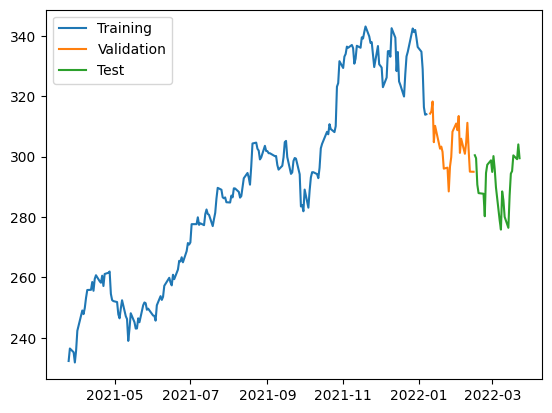

In [16]:
# Calculate indices for splitting the data into training, validation, and test sets
train_end_index = int(len(dates) * 0.8)
val_end_index = int(len(dates) * 0.9)

# Split the data into training, validation, and test sets
dates_train, X_train, y_train = dates[:train_end_index], X[:train_end_index], y[:train_end_index]
dates_val, X_val, y_val = dates[train_end_index:val_end_index], X[train_end_index:val_end_index], y[train_end_index:val_end_index]
dates_test, X_test, y_test = dates[val_end_index:], X[val_end_index:], y[val_end_index:]

# Plot the target values for the training, validation, and test sets
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

# Add legend for better visualization
plt.legend(['Training', 'Validation', 'Test'])


In [17]:
# Import necessary modules from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Create a sequential model
model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model with mean squared error loss, Adam optimizer, and mean absolute error as a metric
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# Train the model on the training data, validating on the validation data, for 100 epochs
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
7/7 [==============================] - 4s 145ms/step - loss: 84476.0078 - mean_absolute_error: 288.9068 - val_loss: 92086.8906 - val_mean_absolute_error: 303.3709
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 84136.9141 - mean_absolute_error: 288.3170 - val_loss: 91756.3984 - val_mean_absolute_error: 302.8257
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 83812.9375 - mean_absolute_error: 287.7524 - val_loss: 91373.9609 - val_mean_absolute_error: 302.1936
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 83376.2812 - mean_absolute_error: 286.9913 - val_loss: 90749.0234 - val_mean_absolute_error: 301.1577
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 82706.3516 - mean_absolute_error: 285.8207 - val_loss: 89978.9922 - val_mean_absolute_error: 299.8766
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 81950.4766 - mean_absolute_error: 284.4980 - val_loss: 89111.

7/7 [==============================] - 1s 4ms/step


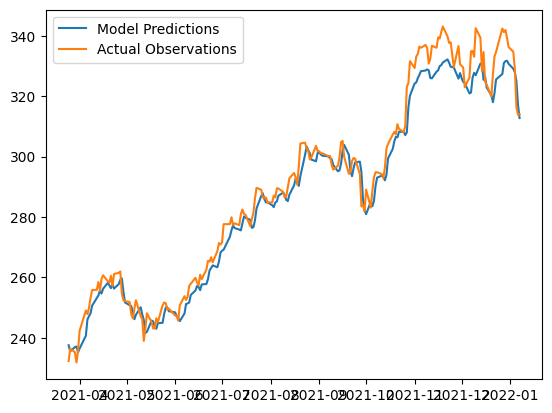

In [18]:
# Generate predictions on the training data using the trained model
train_predictions = model.predict(X_train).flatten()

# Plot the training predictions and actual observations
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

# Add legend for better visualization
plt.legend(['Model Predictions', 'Actual Observations'])


1/1 [==============================] - 0s 34ms/step


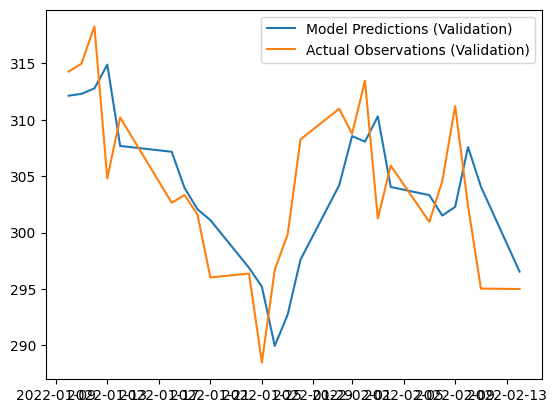

In [19]:
# Generate predictions on the validation data using the trained model
val_predictions = model.predict(X_val).flatten()

# Plot the validation predictions and actual observations
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

# Add legend for better visualization
plt.legend(['Model Predictions (Validation)', 'Actual Observations (Validation)'])


1/1 [==============================] - 0s 30ms/step


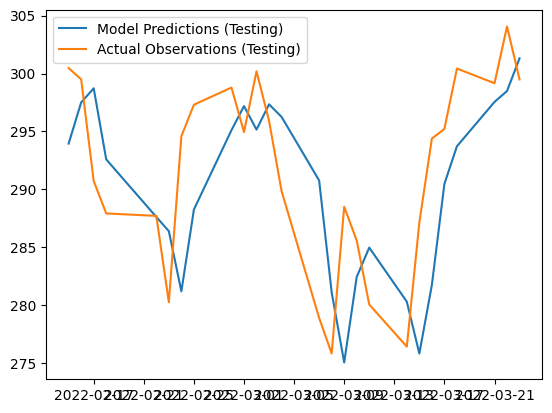

In [20]:
# Generate predictions on the test data using the trained model
test_predictions = model.predict(X_test).flatten()

# Plot the testing predictions and actual observations
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

# Add legend for better visualization
plt.legend(['Model Predictions (Testing)', 'Actual Observations (Testing)'])


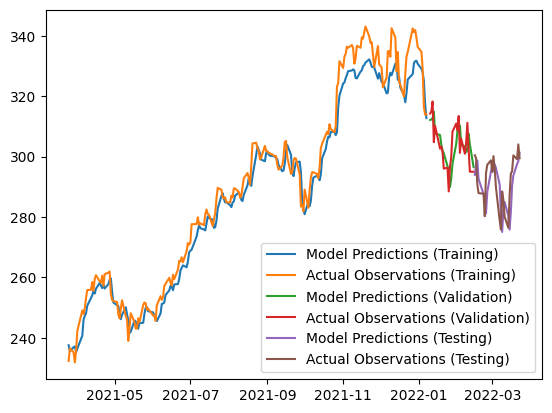

In [21]:
# Plot predictions and actual observations for training, validation, and testing sets
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

# Add legend for better visualization
plt.legend(['Model Predictions (Training)', 'Actual Observations (Training)',
            'Model Predictions (Validation)', 'Actual Observations (Validation)',
            'Model Predictions (Testing)', 'Actual Observations (Testing)'])
